# Speciální úlohy lineárního programování

## Dopravní problém (vyrovnaný)

https://www.youtube.com/watch?v=kFd8WgNwokQ

https://www.youtube.com/watch?v=Jr7LI-sUEmo

Přednáška z konference ESRI v roce 2019:

https://www.youtube.com/watch?v=DaB7J3rm_3M

https://econweb.ucsd.edu/~jsobel/172aw02/notes8.pdf

### Matematický model

$$min \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij}x_{ij}$$
$$ \sum_{j=1}^{n} x_{ij} = S_i,  i=1,...,m$$
$$ \sum_{i=1}^{m} x_{ij} = D_j, j=1,...,n$$

Je důležité ověřit si, že $\sum_{i=1}^{m} S_i = \sum_{j=1}^{n} D_j$. Pokud tato podmínka neplatí (požadavky nejsou v rovnováze s možnostmi), je potřeba úlohu doplnit.

### Příklad

| $D_i \setminus S_i$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ | $d_i$ |
|:--:|:--:|:--:|:--:|:--:|:--:|
| $D_1$ | 5 | 6 | 10 | 15 | 10 |
| $D_2$ | 7 | 6 | 3 | 10 | 10 |
| $D_3$ | 8 | 5 | 15 | 20 | 10 |
| $D_4$ | 10 | 20 | 30 | 30 | 10 |
| $s_j$ | 3 | 8 | 4 | 25 | 40 |

$$C=\begin{pmatrix} 
5 & 6 & 10 & 15\\
7 & 6 & 3 & 10\\
8 & 5 & 15 & 20\\
10 & 20 & 30 & 30
\end{pmatrix}$$
$$D=\begin{pmatrix}
10\\
10\\
10\\
10
\end{pmatrix}$$
$$S=\begin{pmatrix}
3\\
8\\
4\\
28
\end{pmatrix}$$

### Řešení v Python

#### Implementace Vogelovy aproximační metody

https://www.youtube.com/watch?v=HVHPBAKTZWw

In [1]:
from collections import defaultdict
 
def Vogel(costs, demand, supply, debug=False):
    cols = sorted(demand.keys())
    res = dict((k, defaultdict(int)) for k in costs)
    g = {}
    for x in supply:
        g[x] = sorted(costs[x].keys(), key=lambda g: costs[x][g])
    for x in demand:
        g[x] = sorted(costs.keys(), key=lambda g: costs[g][x])

    while g:
        d = {}
        for x in demand:
            d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
        s = {}
        for x in supply:
            s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
        f = max(d, key=lambda n: d[n])
        t = max(s, key=lambda n: s[n])
        t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
        v = min(supply[f], demand[t])
        res[f][t] += v
        demand[t] -= v
        if demand[t] == 0:
            for k, n in supply.items():
                if n != 0:
                    g[k].remove(t)
            del g[t]
            del demand[t]
        supply[f] -= v
        if supply[f] == 0:
            for k, n in demand.items():
                if n != 0:
                    g[k].remove(f)
            del g[f]
            del supply[f]
    return res

In [2]:
import numpy as np

C = {
    'd1':{'s1': 5, 's2': 6, 's3': 10, 's4': 15},
    'd2':{'s1': 7, 's2': 6, 's3': 3, 's4': 10},
    'd3':{'s1': 8, 's2': 5, 's3': 15, 's4': 20},
    'd4':{'s1': 10, 's2': 20, 's3': 30, 's4': 30},
     }

S = {'s1': 3, 's2': 8, 's3': 4, 's4': 25}
D = {'d1': 10, 'd2': 10, 'd3': 10, 'd4': 10}

In [3]:
res = Vogel({**C}, {**S}, {**D})
cols = sorted(S.keys())
for n in cols:
    print("\t", n, end='')
print()
cost = 0
for g in sorted(C):
    print(g, "\t", end='')
    for n in cols:
        y = res[g][n]
        if y != 0:
            #print(y, ',', C[g][n], end='')
            print(y, end='')
        cost += y * C[g][n]
        print("\t", end='')
    print()
print("\n\nTotal Cost = ", cost)

	 s1	 s2	 s3	 s4
d1 				10	
d2 			4	6	
d3 		8		2	
d4 	3			7	


Total Cost =  542


### Příklad

| $A_i \setminus B_i$ | $B_1$ | $B_2$ | $B_3$ | $B_4$ | $B_5$ | $a_1$ |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| $A_1$ | 12 | 8 | 10 | 4 | 9 | 10 |
| $A_2$ | 3 | 3 | 2 | 6 | 10 | 10 |
| $A_3$ | 3 | 7 | 10 | 3 | 2 | 10 |
| $A_4$ | 8 | 5 | 4 | 3 | 5 | 10 |
| $b_j$ | 11 | 8 | 7 | 4 | 10 | 40 |

$$C=
\begin{pmatrix}
12 & 8 & 10 & 4 & 9 \\
3 & 3 & 2 & 6 & 10 \\
3 & 7 & 10 & 3 & 2 \\
8 & 5 & 4 & 3 & 5
\end{pmatrix}$$
$$D=
\begin{pmatrix}
10 \\
10 \\
10 \\
10
\end{pmatrix}$$
$$S=
\begin{pmatrix}
11 \\
8 \\
7 \\
4 \\
10
\end{pmatrix}$$

### Řešení v Python

#### Převod matice na dictionary

In [4]:
def matrix2dict(matrix, dnames, snames):
  result = {}
  for i, dname in enumerate(dnames):
    result[dname] = dict(zip(snames, matrix[i]))
  return result
      
CM = [[12, 8, 10, 4, 9], [3, 3, 2, 6, 10], [3, 7, 10, 3, 2], [8, 5, 4, 3, 5]]      
dnames = ['dod1', 'dod2', 'dod3', 'dod4']
snames = ['spo1', 'spo2', 'spo3', 'spo4', 'spo5']
C = matrix2dict(CM, dnames, snames)
print(C)

{'dod1': {'spo1': 12, 'spo2': 8, 'spo3': 10, 'spo4': 4, 'spo5': 9}, 'dod2': {'spo1': 3, 'spo2': 3, 'spo3': 2, 'spo4': 6, 'spo5': 10}, 'dod3': {'spo1': 3, 'spo2': 7, 'spo3': 10, 'spo4': 3, 'spo5': 2}, 'dod4': {'spo1': 8, 'spo2': 5, 'spo3': 4, 'spo4': 3, 'spo5': 5}}


#### Převod vektoru na dictionary

In [5]:
DM = [10, 10, 10, 10]
D = dict(zip(dnames, DM))
print(D)
SM = [11, 8, 7, 4, 10]
S = dict(zip(snames, SM))
print(S)

{'dod1': 10, 'dod2': 10, 'dod3': 10, 'dod4': 10}
{'spo1': 11, 'spo2': 8, 'spo3': 7, 'spo4': 4, 'spo5': 10}


#### Vlastní řešení

In [6]:
res = Vogel({**C}, {**S}, {**D})
cols = sorted(S.keys())
for n in cols:
    print("\t", n, end='')
print()
cost = 0
for g in sorted(C):
    print(g, "\t", end='')
    for n in cols:
        y = res[g][n]
        if y != 0:
            #print(y, ',', C[g][n], end='')
            print(y, end='')
        cost += y * C[g][n]
        print("\t", end='')
    print()
print("\n\nTotal Cost = ", cost)

	 spo1	 spo2	 spo3	 spo4	 spo5
dod1 		6		4		
dod2 	10					
dod3 					10	
dod4 	1	2	7			


Total Cost =  160


### Příklad

$$C=
\begin{pmatrix}
30 & 10 & 5 \\
15 & 20 & 12
\end{pmatrix}$$

In [7]:
CM = [[30, 10, 5], [15, 20, 12]]
DM = [800, 1200]
SM = [600, 900, 500]
dnames = ['D1', 'D2']
snames = ['S1', 'S2', 'S3']
C = matrix2dict(CM, dnames, snames)
D = dict(zip(dnames, DM))
S = dict(zip(snames, SM))
print(C)
print(D)
print(S)

{'D1': {'S1': 30, 'S2': 10, 'S3': 5}, 'D2': {'S1': 15, 'S2': 20, 'S3': 12}}
{'D1': 800, 'D2': 1200}
{'S1': 600, 'S2': 900, 'S3': 500}


In [8]:
res = Vogel({**C}, {**S}, {**D})
cols = sorted(S.keys())
for n in cols:
    print("\t", n, end='')
print()
cost = 0
for g in sorted(C):
    print(g, "\t", end='')
    for n in cols:
        y = res[g][n]
        if y != 0:
            #print(y, ',', C[g][n], end='')
            print(y, end='')
        cost += y * C[g][n]
        print("\t", end='')
    print()
print("\n\nTotal Cost = ", cost)

	 S1	 S2	 S3
D1 		800		
D2 	600	100	500	


Total Cost =  25000


## Nevyrovnaný dopravní problém

Nevyrovnaným dopravním problémem myslíme dopravní problém, u kterého součet požadavků spotřebitelů není roven součtu kapacit dodavatelů.
$$\sum_i D_i \ne \sum_j S_j$$

Mohou nastat dvě možnosti. 
- Součet požadavků spotřebitelů přesahuje možnosti dodavatelů
- Součet požadavků spotřebitelů je menší než možnosti dodavatelů

### Požadavky přesahují dodávky

V takovém případě lze úlohu rozšířit o dalšího dodavatele, který vykrývá chybějící poptávku. Sazby za přepravu od tohoto dodavatele stanovíme nulové.

### Požadavky nevyčerpají možnosti dodavatelů

V tomto případě úlohu rozšíříme o fiktivního odběratele, který spotřebuje nadbytečné kapacity dodavatelů. Sazby za přepravu k tomuto spotřebiteli stanovíme nulové.

## Přiřazovací problém

$$f(x)=min \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij}x_{ij}$$
$$ \sum_{j=1}^{n} x_{ij} = 1, i=1,...,n $$
$$ \sum_{i=1}^{n} x_{ij} = 1, j=1,...,n $$

### Příklad

$$
C=\begin{pmatrix}
5 & 6 & 10 & 15 \\
7 & 6 & 3 & 10 \\
8 & 5 & 15 & 20 \\
10 & 20 & 30 & 30
\end{pmatrix}
$$

### Řešení v Python

In [9]:
import numpy as np
from scipy.optimize import linear_sum_assignment

In [10]:
costs = np.array([[5, 6, 10, 15], [7, 6, 3, 10], [8, 5, 15, 20], [10, 20, 30, 30]])
row_ind, col_ind = linear_sum_assignment(costs)
print(row_ind, col_ind)
print(costs[row_ind, col_ind].sum())

[0 1 2 3] [3 2 1 0]
33


Interpretace řešení
$$
C=\begin{pmatrix}
5 & 6 & 10 & 15 \\
7 & 6 & 3 & 10 \\
8 & 5 & 15 & 20 \\
10 & 20 & 30 & 30
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
0 & 0 & 0 & 15 \\
0 & 0 & 3 & 0 \\
0 & 5 & 0 & 0 \\
10 & 0 & 0 & 0 
\end{pmatrix}
$$

### Příklad

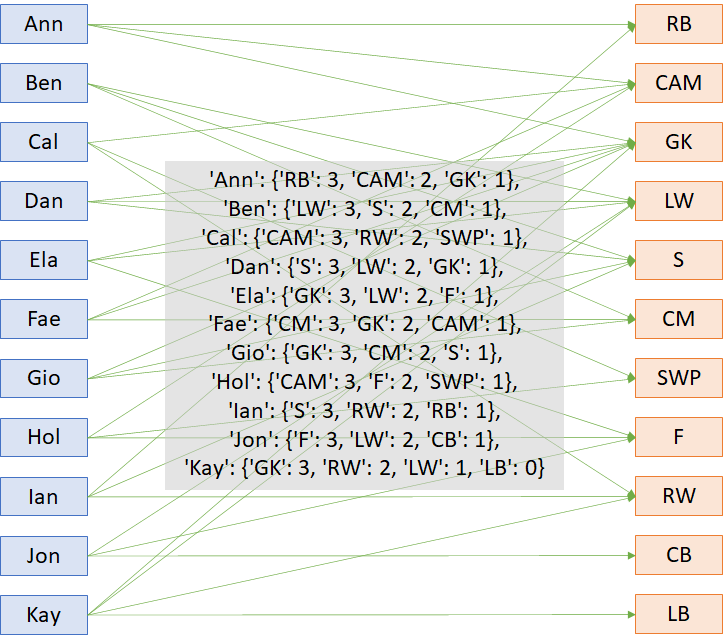

### Řešení v Python

In [11]:
!pip install hungarian-algorithm

In [12]:
from hungarian_algorithm import algorithm
G = {
	'Ann': {'RB': 3, 'CAM': 2, 'GK': 1},
	'Ben': {'LW': 3, 'S': 2, 'CM': 1},
	'Cal': {'CAM': 3, 'RW': 2, 'SWP': 1},
	'Dan': {'S': 3, 'LW': 2, 'GK': 1},
	'Ela': {'GK': 3, 'LW': 2, 'F': 1},
	'Fae': {'CM': 3, 'GK': 2, 'CAM': 1},
	'Gio': {'GK': 3, 'CM': 2, 'S': 1},
	'Hol': {'CAM': 3, 'F': 2, 'SWP': 1},
	'Ian': {'S': 3, 'RW': 2, 'RB': 1},
	'Jon': {'F': 3, 'LW': 2, 'CB': 1},
	'Kay': {'GK': 3, 'RW': 2, 'LW': 1, 'LB': 0}
}
result = algorithm.find_matching(G, matching_type = 'max', return_type = 'list' )
print(result)

[(('Ann', 'RB'), 3), (('Gio', 'GK'), 3), (('Hol', 'SWP'), 1), (('Ben', 'LW'), 3), (('Ian', 'CB'), 0), (('Dan', 'S'), 3), (('Kay', 'RW'), 2), (('Jon', 'F'), 3), (('Cal', 'CAM'), 3), (('Ela', 'LB'), 0), (('Fae', 'CM'), 3)]


### Příklad


('#191', '#122', '#173', '#121', '#128', '#104')  
('A', 'B', 'C', 'D', 'E', 'F')
$$C = \begin{pmatrix} 
22 & 14 & 120 & 21 & 4 & 51 \\
19 & 12 & 172 & 21 & 28 & 43 \\
161 & 122 & 2 & 50 &128 & 39 \\
1 & 30 & 113 & 14 & 28 & 86 \\
60 & 70 & 170 & 28 & 68 & 104
\end{pmatrix}$$

### Řešení v Python

In [13]:
H = {
	'A': { '#191': 22, '#122': 14, '#173': 120, '#121': 21, '#128': 4, '#104': 51 },
	'B': { '#191': 19, '#122': 12, '#173': 172, '#121': 21, '#128': 28, '#104': 43 },
	'C': { '#191': 161, '#122': 122, '#173': 2, '#121': 50, '#128': 128, '#104': 39 },
	'D': { '#191': 19, '#122': 22, '#173': 90, '#121': 11, '#128': 28, '#104': 4 },
	'E': { '#191': 1, '#122': 30, '#173': 113, '#121': 14, '#128': 28, '#104': 86 },
	'F': { '#191': 60, '#122': 70, '#173': 170, '#121': 28, '#128': 68, '#104': 104 },
}
result = algorithm.find_matching(H, matching_type = 'min', return_type = 'list' )
print(result)

[(('F', '#121'), 28), (('B', '#122'), 12), (('E', '#191'), 1), (('D', '#104'), 4), (('A', '#128'), 4), (('C', '#173'), 2)]


### Příklad

$$C=\begin{pmatrix}
1 & 2 & 3 & 4 \\
2 & 4 & 6 & 8 \\
3 & 6 & 9 & 12  \\
4 & 8 & 12 & 16
\end{pmatrix}$$

### Řešení v Python

In [14]:
CM = [[1, 2, 3, 4], [2, 4, 6, 8], [3, 6, 9, 12], [4, 8, 12, 16]]
dnames = ['worker1', 'worker2', 'worker3', 'worker4']
snames = ['job1', 'job2', 'job3', 'job4', 'job5']

C = matrix2dict(CM, dnames, snames)
result = algorithm.find_matching(C, matching_type = 'min', return_type = 'list' )
print(result)

[(('worker3', 'job2'), 6), (('worker2', 'job3'), 6), (('worker1', 'job4'), 4), (('worker4', 'job1'), 4)]


### Zdroje

https://brc2.com/the-algorithm-workshop/

https://www.youtube.com/watch?v=kFd8WgNwokQ

https://www.youtube.com/watch?v=Jr7LI-sUEmo

Přednáška z konference ESRI v roce 2019:

https://www.youtube.com/watch?v=DaB7J3rm_3M

https://econweb.ucsd.edu/~jsobel/172aw02/notes8.pdf